In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
import pdb
sns.set()

In [2]:
extracted_data = pd.read_excel('MA_data.xlsx')

In [3]:
extracted_data

,line,author,title,year,design,recruit,procedure,indication,population,atm,...,brip1,cdh1,chek2,nbn,palb2,pten,stk11,tp53,rad51c,rad51d
0,1,The Cancer Genome Atlas Network,Comprehensive molecular portraits of human bre...,2012,not stated,not stated,whole exome sequencing,breast cancer,507,9,...,3,0,2,4,0,1,0,2,1,0
1,2,Tung et al,Frequency of Germline Mutations in 25 Cancer S...,2016,Prospective,2010-2012,NGS + Sanger for confirmation,breast cancer,488,5,...,4,0,10,1,1,1,0,0,1,1


In [26]:
mutations_atm = extracted_data.atm.values.astype(int)
mutations_bard1 = extracted_data.bard1.values.astype(int)
mutations_brca1 = extracted_data.brca1.values.astype(int)
mutations_brca2 = extracted_data.brca2.values.astype(int)
mutations_brip1 = extracted_data.brip1.values.astype(int)
mutations_cdh1 = extracted_data.cdh1.values.astype(int)
mutations_chek2 = extracted_data.chek2.values.astype(int)
mutations_nbn = extracted_data.nbn.values.astype(int)
mutations_palb2 = extracted_data.palb2.values.astype(int)
mutations_pten = extracted_data.pten.values.astype(int)
mutations_stk11 = extracted_data.stk11.values.astype(int)
mutations_tp53 = extracted_data.tp53.values.astype(int)
mutations_rad51c = extracted_data.rad51c.values.astype(int)
mutations_rad51d = extracted_data.rad51d.values.astype(int)
mutations_bard1

array([0, 0])

In [9]:
import theano.tensor as tt
invlogit = pm.math.invlogit

def RE_model(mutation_count):
    
    with pm.Model() as model:

        i = extracted_data.shape[0]
        mutation_count = mutation_count
        n = extracted_data.population.values.astype(int)

        # Study random effect
        mu_gamma = pm.Normal('mu_gamma', 0, sd = 100000)
        sigma_gamma = pm.Uniform('sigma_gamma', 0, 10)
        gamma = pm.Normal('gamma', mu = mu_gamma, sd = sigma_gamma)
      
        # Study-specific probabilities
        p_i = pm.Deterministic('p', invlogit(gamma))

        obs = pm.Binomial('obs', n=n, p= p_i, observed=mutation_count)
        
    return model

Gene: ATM

In [10]:
atm = RE_model(mutations_atm)

In [12]:
with atm:
    atm_trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -18.688: 100%|███████| 200000/200000 [00:12<00:00, 15966.79it/s]
Finished [100%]: Average ELBO = -19.007
WARNING (theano.gof.compilelock): Overriding existing lock by dead process '2148' (I am process '3096')
100%|███████████████████████████████████| 10000/10000 [00:18<00:00, 546.48it/s]


In [13]:
atm_burned_trace = atm_trace[5000:]

In [18]:
# pm.summary(atm_burned_trace, varnames = ['p'])

In [19]:
# pm.forestplot(atm_burned_trace, varnames=['p'])

In [ ]:
p_atm = atm_burned_trace.p

In [23]:
np.save('posterior_atm', p_atm)

Gene: BARD1

In [21]:
bard1 = RE_model(mutations_bard1)

In [22]:
with bard1:
    bard1_trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -13.673: 100%|███████| 200000/200000 [00:12<00:00, 15730.69it/s]
Finished [100%]: Average ELBO = -13.702
100%|██████████████████████████████████| 10000/10000 [4:54:49<00:00,  1.77s/it]


In [24]:
bard1_burned_trace = bard1_trace[5000:]

In [25]:
pm.summary(bard1_burned_trace, varnames=['p'])


p:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.000            0.000            0.000            [0.000, 0.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          0.000          0.000          0.000



C:\Users\larsasp_local\Anaconda2\lib\site-packages\matplotlib\axes\_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.22044604925e-16, right=2.22044604925e-16
  'left=%s, right=%s') % (left, right))


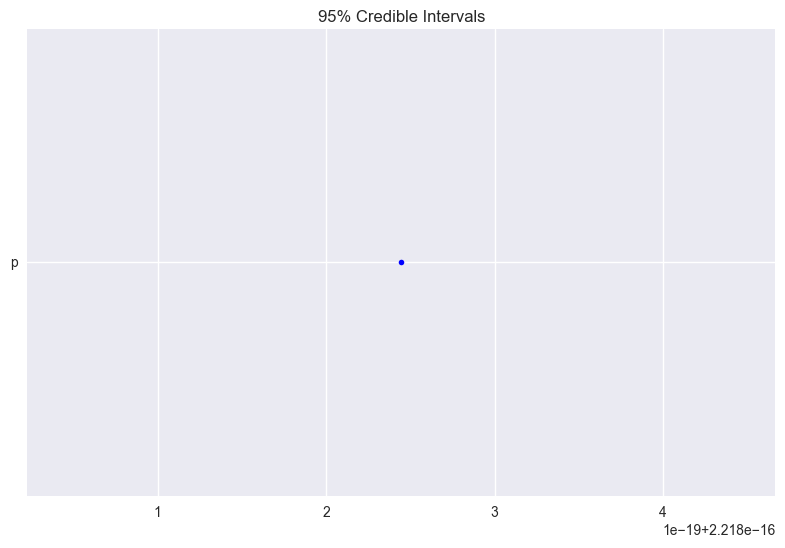

In [27]:
pm.forestplot(bard1_burned_trace, varnames = ['p'])

In [28]:
p_bard1 = bard1_burned_trace.p

In [29]:
p_bard1

array([  2.22044605e-16,   2.22044605e-16,   2.22044605e-16, ...,
         2.22044605e-16,   2.22044605e-16,   2.22044605e-16])

In [31]:
np.save('posterior_bard1', p_bard1)